**THE SPARKS FOUNDATION**

**GRIP June'21**

TASK 1 - Prediction using Supervised ML
To Predict the percentage of marks of the students based on the number of hours they studied

***Author - Akshaya Visvanathan***

In [ ]:
#Step1: Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# Reading the Data 
data = pd.read_csv('http://bit.ly/w-data')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
#Exploratory Data Analsis: Check for null values and drop if any
data.isnull == True

False

**Data Visualization**

Data visualization gives us a clear idea of what the information means by giving it visual context through maps or graphs.
Since our data has no null values, we can now represent them through graphs.

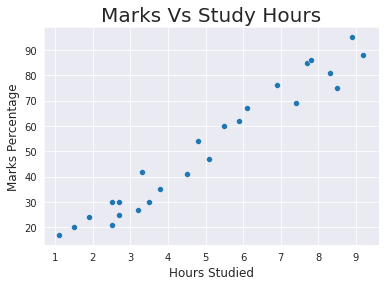

In [ ]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**From the above Scatter plot, it is clear that there is a linear relationship between the independent variable, 'Hours studied' and the dependent variable, 'Percentage of Marks'**
**We now draw a line of best fit to prove the correlation**

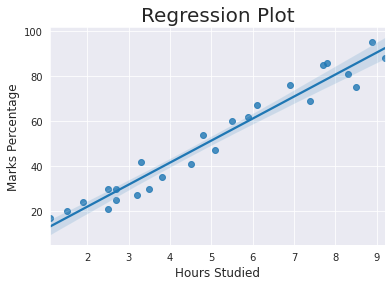

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [ ]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

We observe that most of the points align with the regression line.
**Therefore, it is confirmed that the variables are positively correlated**

**Training the Model**

Supervised learning is a method by which you can use labeled training data to train a function that you can then generalize for new examples.

In [ ]:
#The libraries required for model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

Step 1: Splitting the Dataset into Test and Train sets 

In [ ]:
# Defining X and y from the Data
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

Step 2: Fitting the Data into the Model

In [ ]:
regression = LinearRegression()
regression.fit(train_X, train_y)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**---Model Trained successfully---**

**Testing the Model : Prediction of Percentage based on hours of study**

In [ ]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


**Error Prediction: Comparing the Predicted Marks with the Actual Marks**

In [ ]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


**Error Prediction Visualization: Comparing the Predicted Marks with the Actual Marks**

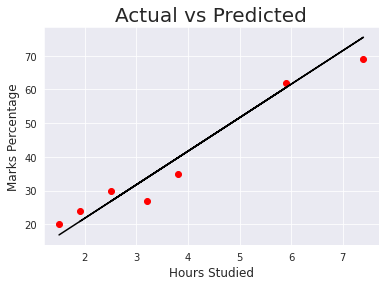

In [ ]:
plt.scatter(x=val_X, y=val_y, color='red')
plt.plot(val_X, pred_y, color='Black')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

**Model Evaluation**

In [ ]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


**Small value of Mean absolute error states that the chances of error or wrong forecasting through the model are very less.**

##**What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [ ]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


**According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.**